<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/CaseStudyRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Dataset

In [407]:
import pandas as pd

In [408]:
Data=pd.read_csv('/content/insurance.csv')

In [409]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Data Exploration

In [410]:
Data.shape

(1338, 7)

In [411]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [412]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [413]:
Data.duplicated().sum()

np.int64(1)

In [414]:
Data.drop_duplicates(inplace=True)

In [415]:
Data.duplicated().sum()

np.int64(0)

In [416]:
Data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [417]:
Data.select_dtypes(include='number').skew() # checking skewness

,0
age,0.054781
bmi,0.283914
children,0.937421
charges,1.515391


<Axes: >

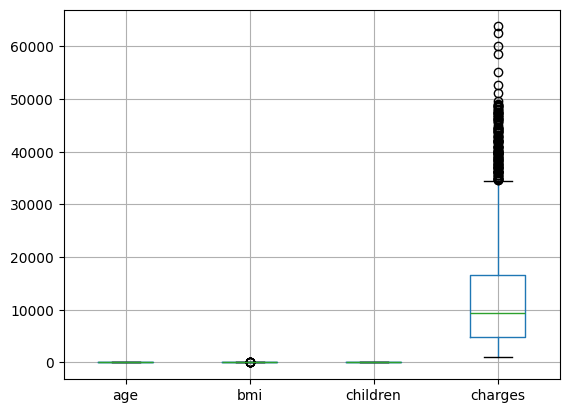

In [418]:
Data.boxplot()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

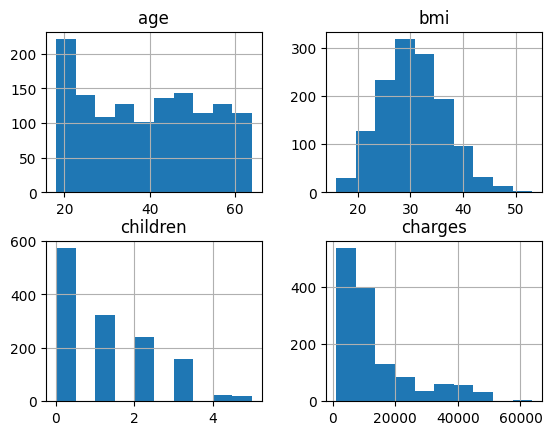

In [419]:
Data.hist()

##Visualization

In [420]:
Number=Data.select_dtypes(include='number')
correlation=Number.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


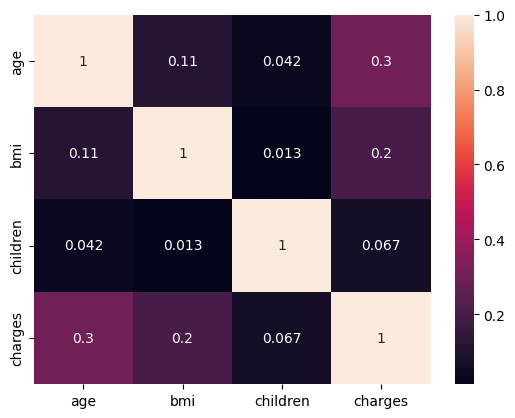

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation,annot=True)
plt.show()

In [422]:
#Storing the categorical column
categorical=Data.select_dtypes(include='object').columns
categorical


Index(['sex', 'smoker', 'region'], dtype='object')

In [423]:
#Storing the Numerical column

Data_num=Data.select_dtypes(include='number').columns
Data_num

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

##Encoding

In [424]:
for col in categorical:
  print(col)
  print(Data[col].unique())

sex
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']


In [425]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for binary columns

label_encoder = LabelEncoder()

# Encode 'sex' (male/female)
Data['sex'] = label_encoder.fit_transform(Data['sex'])

# Encode 'smoker' (yes/no)
Data['smoker'] = label_encoder.fit_transform(Data['smoker'])

# 2. One-Hot Encoding for region

Data = pd.get_dummies(Data, columns=['region'], drop_first=True)

print(Data.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


##Scaling

In [426]:
# feature engineering selecting the features and the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = Data.drop("charges", axis=1) #feature selection
y = Data["charges"]  # target selection


print(X.shape)
print(y.shape)

(1337, 8)
(1337,)


In [427]:
#Scaling the features ,target are not scaled


scaler = StandardScaler()
X = scaler.fit_transform(X)


In [428]:
X

array([[-1.44041773, -1.00977099, -0.45315959, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.99032355,  0.50942165, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-0.79935006,  0.99032355,  0.3831546 , ..., -0.5655458 ,
         1.63495472, -0.56669767],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-1.29795825, -1.00977099, -0.79752426, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [ 1.55123139, -1.00977099, -0.26129928, ...,  1.76820338,
        -0.61163774, -0.56669767]])

In [429]:
# splitting the data to test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 8)
(268, 8)
(1069,)
(268,)


#Machine learning

#Models

In [430]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# 1. Linear Regression

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
y_pred_test1 = model1.predict(X_test)

lr_train_r2 = r2_score(y_train, y_pred_train1)
lr_test_r2 = r2_score(y_test, y_pred_test1)
lr_mae = mean_absolute_error(y_test, y_pred_test1)
lr_mse = mean_squared_error(y_test, y_pred_test1)


In [431]:
# 2. Ridge Regression

from sklearn.linear_model import Ridge
model2 = Ridge(alpha=1.0)
model2.fit(X_train, y_train)
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

ridge_train_r2 = r2_score(y_train, y_pred_train2)
ridge_test_r2 = r2_score(y_test, y_pred_test2)
ridge_mae = mean_absolute_error(y_test, y_pred_test2)
ridge_mse = mean_squared_error(y_test, y_pred_test2)


In [432]:
# 3. Random Forest


from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

rf_train_r2 = r2_score(y_train, y_pred_train3)
rf_test_r2 = r2_score(y_test, y_pred_test3)
rf_mae = mean_absolute_error(y_test, y_pred_test3)
rf_mse = mean_squared_error(y_test, y_pred_test3)


In [433]:
# 4. Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model4.fit(X_train, y_train)
y_pred_train4 = model4.predict(X_train)
y_pred_test4 = model4.predict(X_test)

gb_train_r2 = r2_score(y_train, y_pred_train4)
gb_test_r2 = r2_score(y_test, y_pred_test4)
gb_mae = mean_absolute_error(y_test, y_pred_test4)
gb_mse = mean_squared_error(y_test, y_pred_test4)



In [434]:
# 5. XGBoost

from xgboost import XGBRegressor
model5 = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
model5.fit(X_train, y_train)
y_pred_train5 = model5.predict(X_train)
y_pred_test5 = model5.predict(X_test)

xgb_train_r2 = r2_score(y_train, y_pred_train5)
xgb_test_r2 = r2_score(y_test, y_pred_test5)
xgb_mae = mean_absolute_error(y_test, y_pred_test5)
xgb_mse = mean_squared_error(y_test, y_pred_test5)


In [435]:
 pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "r2_train score": [lr_train_r2, ridge_train_r2, rf_train_r2, gb_train_r2, xgb_train_r2],
    "r2_testscore": [lr_test_r2, ridge_test_r2, rf_test_r2, gb_test_r2, xgb_test_r2],
    "MAE": [lr_mae, ridge_mae, rf_mae, gb_mae, xgb_mae],
    "MSE": [lr_mse, ridge_mse, rf_mse, gb_mse, xgb_mse],

})


,Model,r2_train score,r2_testscore,MAE,MSE
0,Linear Regression,0.729906,0.806929,4177.045561,3.547802e+07
1,Ridge Regression,0.729905,0.806738,4179.664233,3.551302e+07
2,Random Forest,0.973810,0.879155,2651.252336,2.220599e+07
3,Gradient Boosting,0.891603,0.900836,2518.725043,1.822193e+07
4,XGBoost,0.995809,0.865133,2921.085498,2.478271e+07


Linera Regression and Ridge Regression have small differnce in the r2_train score	,r2_testscore other models the difference is high so best to choose linear or ridge model

# Testing on unseen Data

In [436]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# unseen data

unseen_data = {
    "age": [19, 50],
    "sex": ["female", "male"],
    "bmi": [27.9, 30.5],
    "children": [0, 2],
    "smoker": ["yes", "no"],
    "region": ["southwest", "northeast"]
}

unseen_df = pd.DataFrame(unseen_data)

# 2. Label Encoding for binary columns

label_encoder = LabelEncoder()
unseen_df['sex'] = label_encoder.fit_transform(unseen_df['sex'])
unseen_df['smoker'] = label_encoder.fit_transform(unseen_df['smoker'])


# 3. One-Hot Encoding for 'region'

region_dummies = pd.get_dummies(unseen_df['region'], prefix='region')

# Drop original 'region' column and combine
unseen_df = unseen_df.drop('region', axis=1)
final_unseen_df = pd.concat([unseen_df, region_dummies], axis=1)

# 4. Align columns to match training data

training_region_cols = ['region_northeast', 'region_southeast', 'region_southwest']

# Add any missing region columns with 0
for col in training_region_cols:
    if col not in final_unseen_df.columns:
        final_unseen_df[col] = 0

# Reorder columns exactly as training data
final_unseen_df = final_unseen_df[['age','sex','bmi','children','smoker'] + training_region_cols]

print("Processed Unseen Data:\n", final_unseen_df)

#Scaling the data

from sklearn.preprocessing import StandardScaler
scaled=StandardScaler().fit_transform(final_unseen_df)

# 5. Predict using Linear Regression (model1)

predicted_charges = model1.predict(final_unseen_df)
print("\nPredicted Charges for Unseen Data:\n", predicted_charges)


Processed Unseen Data:
    age  sex   bmi  children  smoker  region_northeast  region_southeast  \
0   19    0  27.9         0       1             False                 0   
1   50    1  30.5         2       0              True                 0   

   region_southwest  
0              True  
1             False  

Predicted Charges for Unseen Data:
 [142658.62867245 247769.20381051]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [437]:
import joblib

In [438]:
joblib.dump(model1,"insurance_model1.pkl")

['insurance_model1.pkl']